# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

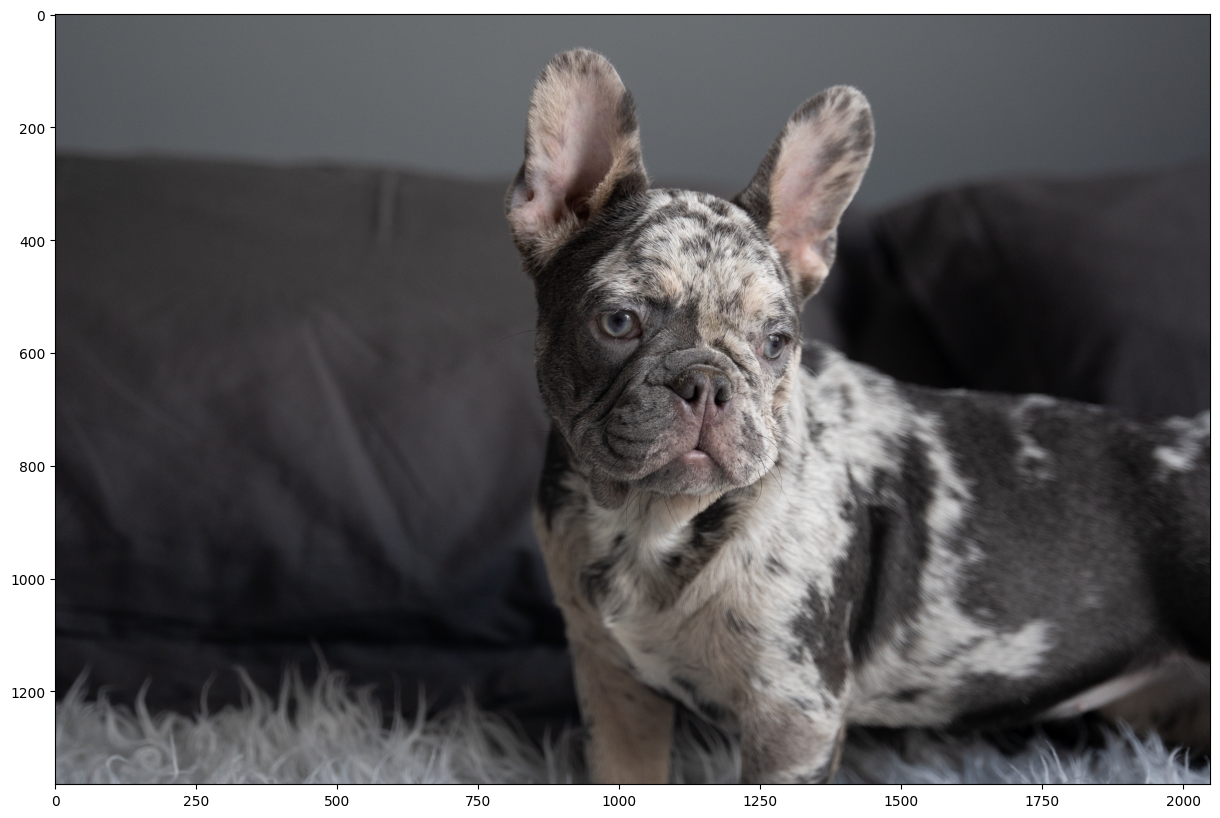

In [3]:
img = cv2.imread('../data/111.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

(<Axes: title={'center': 'Unsharp'}>,
 Text(0.5, 1.0, 'Unsharp'))

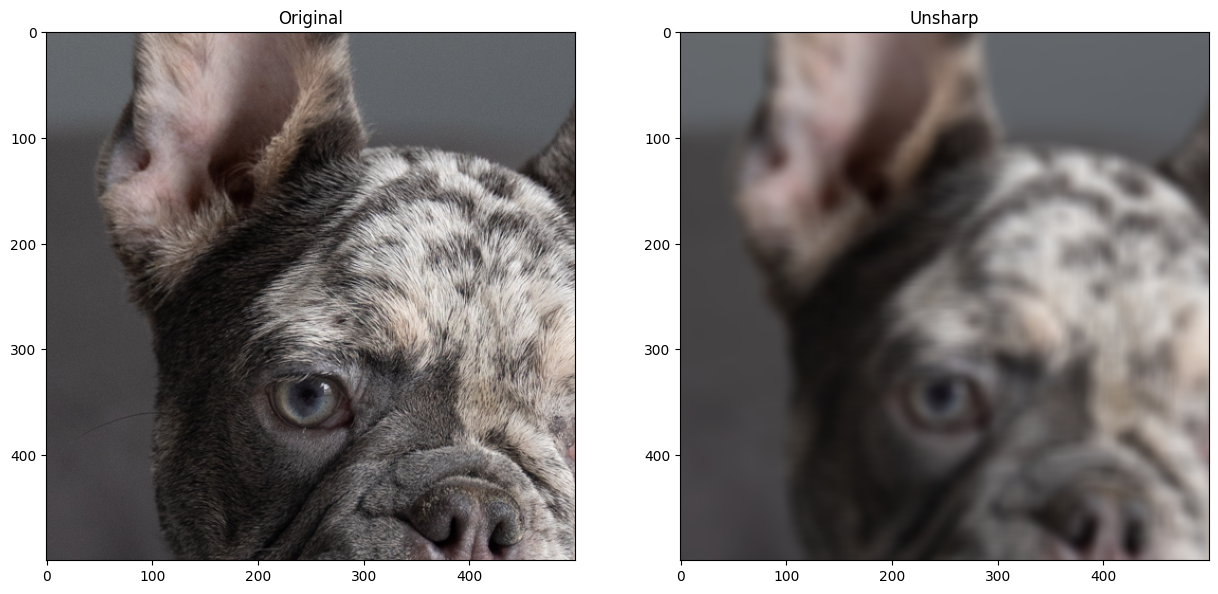

In [15]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(15,15), sigmaX=10)

plt.subplot(121), plt.imshow(img[200:700, 750:1250, :]), plt.title('Original')
plt.subplot(122), plt.imshow(unsharp[200:700, 750:1250, :]), plt.title('Unsharp')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-115.0..145.0].


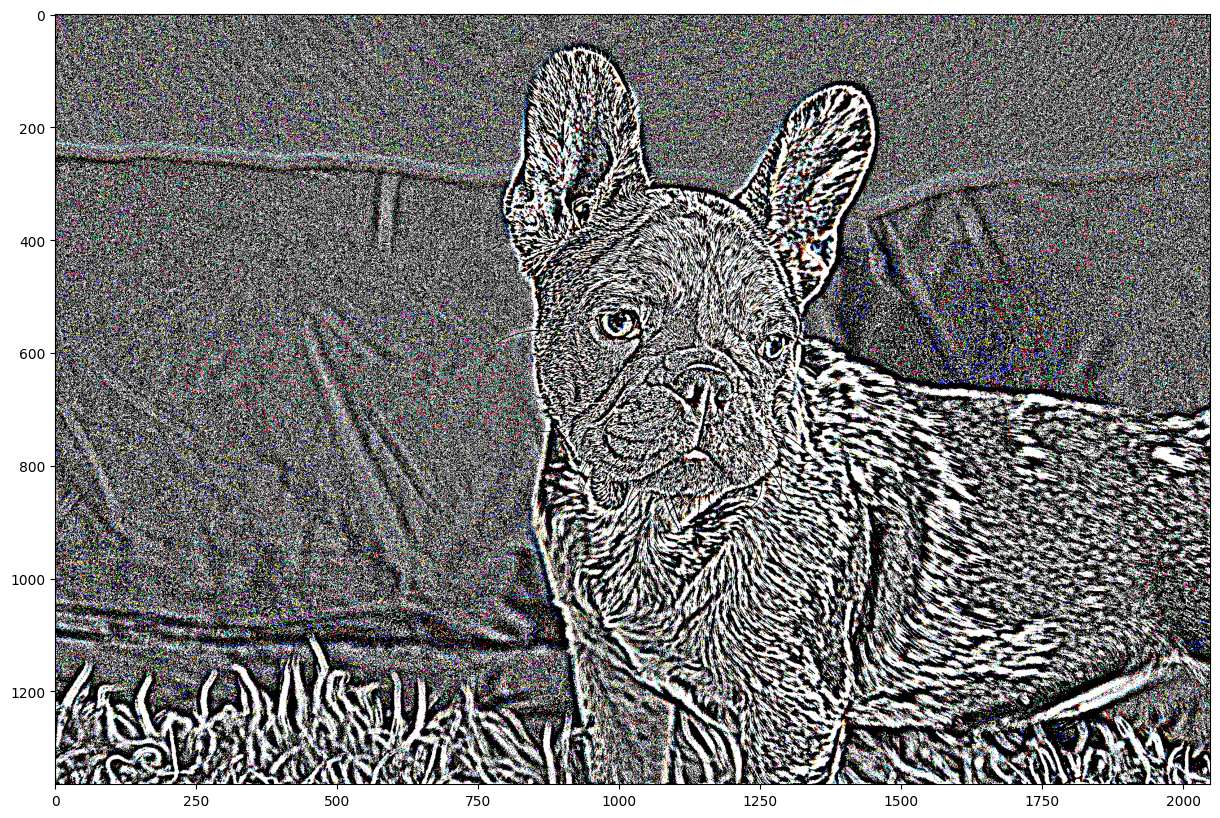

In [26]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = img.astype(np.float32) - unsharp.astype(np.float32)

# This looks like an edge map :)
plt.imshow(diff, cmap='gray')

(<Axes: title={'center': 'Sharpened, a=2.5'}>,
 Text(0.5, 1.0, 'Sharpened, a=2.5'))

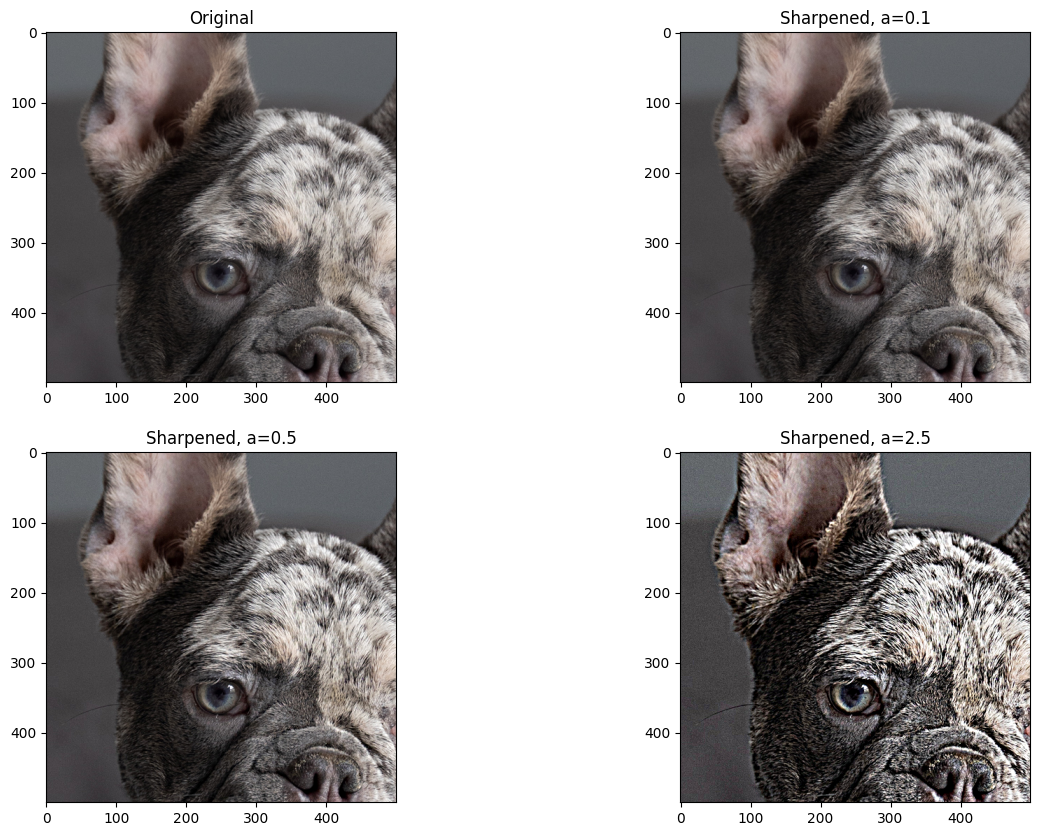

In [39]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
amounts = np.array([0.1, 0.5, 2.5])

img_f32 = img.astype(np.float32)

# Reshape 'amounts' for broadcasting
amounts = amounts[:, np.newaxis, np.newaxis, np.newaxis]  # Shape: (3, 1, 1, 1)

# Compute the sharpened images
sharpened = img_f32 + diff * amounts  # Shape: (3, height, width, channels)

# Clip and convert to uint8
sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

plt.subplot(221), plt.imshow(img[200:700, 750:1250, :]), plt.title('Original')
plt.subplot(222), plt.imshow(sharpened[0][200:700, 750:1250, :]), plt.title('Sharpened, a=0.1')
plt.subplot(223), plt.imshow(sharpened[1][200:700, 750:1250, :]), plt.title('Sharpened, a=0.5')
plt.subplot(224), plt.imshow(sharpened[2][200:700, 750:1250, :]), plt.title('Sharpened, a=2.5')

### Questions
* What is a good (reasonable) value for the `amount` parameter?

A: Based on examples above I would say, and Wikipedia agrees with me, that the reasonable amount is in (0.5, 1.5) range.

 * What happens if it is too small?

A: If it's too small (i.e. 0.1) the sharpening is barely noticeable, high frequencies are not amplified enough

 * What happens if it is too large?

A: If it's too large (i.e. 2.5) the image is over-sharpened, we lose the smoothness and poor frenchie starts to look like a porcupine ;)